In [2]:
url = ""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the hear disease data csv file
import pandas as pd
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [4]:
values = df["SleepTime"].value_counts()
values

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

In [5]:
sleeping_replace = list(values[values<250].index)
sleeping_replace

[14.0, 16.0, 15.0, 18.0, 13.0, 20.0, 24.0, 17.0, 22.0, 19.0, 23.0, 21.0]

In [6]:
for amount in sleeping_replace:
  df["SleepTime"] = df["SleepTime"].replace(amount, "NA")

In [7]:
sleep_count = df["SleepTime"].value_counts()
sleep_count

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
NA        999
2.0       788
1.0       551
11.0      415
Name: SleepTime, dtype: int64

In [8]:
filtered_df = pd.get_dummies(df,dtype=float)
filtered_df.head(10)

,BMI,PhysicalHealth,MentalHealth,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,SleepTime_10.0,SleepTime_11.0,SleepTime_12.0,SleepTime_NA,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,20.34,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,26.58,20.0,30.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,24.21,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,23.71,28.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,28.87,6.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,21.63,15.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,31.64,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,26.45,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,40.69,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [9]:
y = filtered_df['HeartDisease_Yes']
X = filtered_df.drop(columns={'HeartDisease_Yes', 'HeartDisease_No'})
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify=y)

In [10]:
X

,BMI,PhysicalHealth,MentalHealth,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,...,SleepTime_10.0,SleepTime_11.0,SleepTime_12.0,SleepTime_NA,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,20.34,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,26.58,20.0,30.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,24.21,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,23.71,28.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,29.84,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,24.24,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,32.81,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [11]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
number_input_features = len( X_train_scaled[0])
number_input_features

62

## Compile, Train and Evaluate the Model

In [13]:
number_input_features = len( X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation='relu', input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                3150      
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4711 (18.40 KB)
Trainable params: 4711 (18.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [15]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
7496/7496 [==============================] - 17s 2ms/step - loss: 0.2318 - accuracy: 0.9142
Epoch 2/100
7496/7496 [==============================] - 16s 2ms/step - loss: 0.2256 - accuracy: 0.9160
Epoch 3/100
7496/7496 [==============================] - 17s 2ms/step - loss: 0.2248 - accuracy: 0.9159
Epoch 4/100
7496/7496 [==============================] - 17s 2ms/step - loss: 0.2241 - accuracy: 0.9160
Epoch 5/100
7496/7496 [==============================] - 16s 2ms/step - loss: 0.2237 - accuracy: 0.9162
Epoch 6/100
7496/7496 [==============================] - 16s 2ms/step - loss: 0.2232 - accuracy: 0.9163
Epoch 7/100
7496/7496 [==============================] - 16s 2ms/step - loss: 0.2227 - accuracy: 0.9166
Epoch 8/100
7496/7496 [==============================] - 16s 2ms/step - loss: 0.2223 - accuracy: 0.9167
Epoch 9/100
7496/7496 [==============================] - 16s 2ms/step - loss: 0.2218 - accuracy: 0.9167
Epoch 10/100
7496/7496 [==============================] - 16s 2m

In [16]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2499/2499 - 9s - loss: 0.2460 - accuracy: 0.9118 - 9s/epoch - 4ms/step
Loss: 0.24595235288143158, Accuracy: 0.9117687344551086


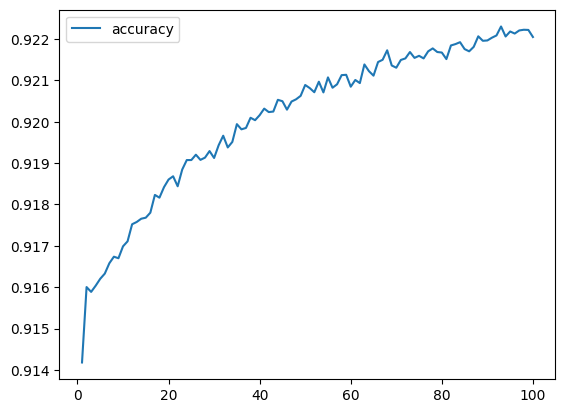

In [17]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [18]:
from google.colab import files

nn.save('sleep_project.h5')
files.download('sleep_project.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>